# Human Activity Recognition: Clustering and Dimensionality Reduction

## Project Overview
This notebook analyzes the UCI Human Activity Recognition dataset, which contains measurements from smartphone sensors during various physical activities. Our goal is to uncover patterns and groupings in this high-dimensional data through clustering and dimensionality reduction techniques.

The dataset has been pre-processed to include 561 features, representing different aspects of sensor dynamics. Although it's a time series dataset, we'll treat each of the 7352 samples in the training set individually.

### Project Objectives

Our analysis will be divided into four main parts:

1. Choosing and applying a clustering algorithm to identify groups of similar activities
2. Analyzing the quality and validity of the clustering solution
3. Selecting and implementing a dimensionality reduction technique to visualize the high-dimensional data
4. Visualizing and interpreting the clusters in the reduced feature space

For each part, we'll implement the necessary code and provide a brief justification or discussion of our approach and results.

Through this analysis, we aim to gain insights into how different physical activities are represented in smartphone sensor data and how they can be effectively grouped and visualized.

Let's begin by loading and exploring the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [2]:
dataset = np.load('data/UCI_HAR.npz')

x_train = dataset['x_train']
y_train = dataset['y_train']

print(f'The training set contains {x_train.shape[0]} samples, each with {x_train.shape[1]} features.')
print(f'There are {len(np.unique(y_train))} classes.')

The training set contains 7352 samples, each with 561 features.
There are 6 classes.


### Clustering Analysis of the Human Activity Recognition Data

Our first task is to apply a clustering algorithm to our dataset. This will help us identify natural groupings within the human activity data. We'll need to:

1. Choose an appropriate clustering algorithm
2. Perform analysis to select optimal hyperparameters for the chosen algorithm
3. Apply the clustering algorithm to our dataset

This step will provide insights into how different activities might be grouped based on the sensor data. It will also serve as a foundation for our subsequent dimensionality reduction and visualization tasks.

Let's start by selecting a clustering algorithm and determining the best way to optimize its parameters.

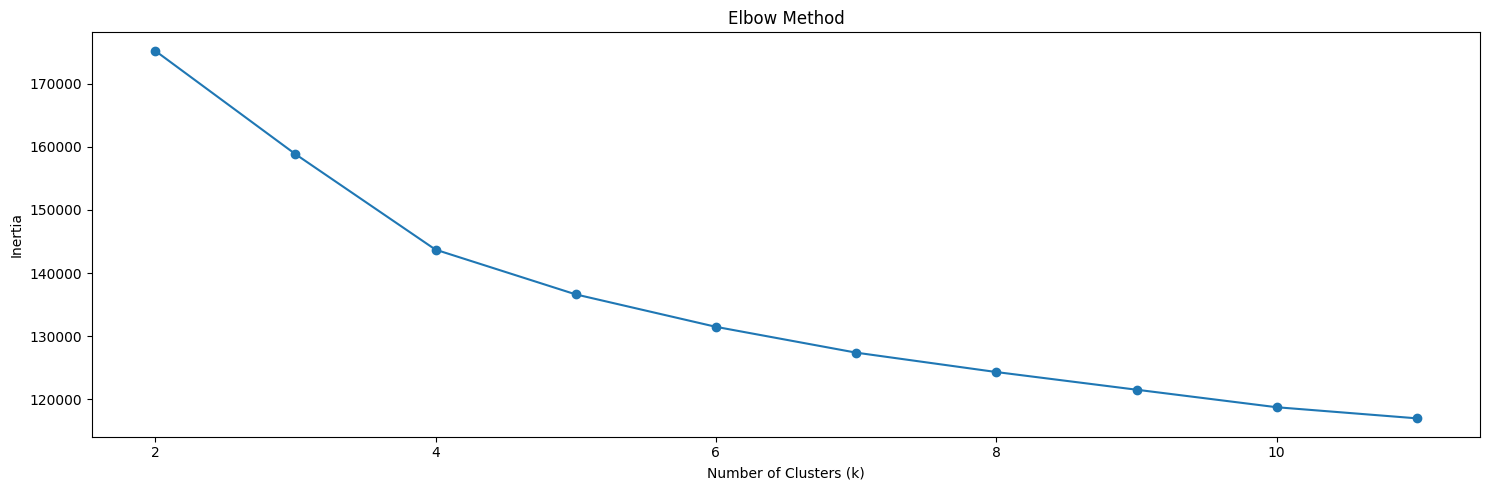

In [52]:
import numpy as np

# Range of clusters to try
possible_clusters = range(2, 12)  # Start from 2 as silhouette score is not defined for 1 cluster

inertia_values = []

for n_clusters in possible_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(x_train)
    
    inertia_values.append(kmeans.inertia_)

# Plotting
fig, (ax2) = plt.subplots(figsize=(15, 5))

# Elbow curve plot
ax2.plot(possible_clusters, inertia_values, marker='o')
ax2.set_title('Elbow Method')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Inertia')

plt.tight_layout()
plt.show()

We can see from the graph that the number of clusters that best explains the data categories is 6.

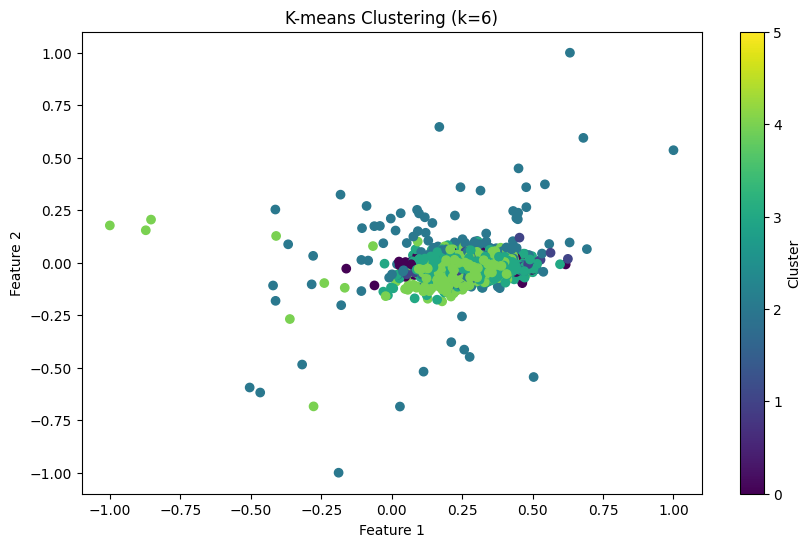

Number of samples in each cluster:
Cluster 0: 346
Cluster 1: 1282
Cluster 2: 880
Cluster 3: 1361
Cluster 4: 1589
Cluster 5: 1894


In [53]:
optimal_clusters = 6

# Use the optimal number of clusters from silhouette analysis
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(x_train)

# Visualizing the clusters (First two features selected)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_train[:, 0], x_train[:, 1], c=cluster_labels, cmap='viridis')
plt.title(f'K-means Clustering (k={optimal_clusters})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

print("Number of samples in each cluster:")
for i in range(optimal_clusters):
    print(f"Cluster {i}: {np.sum(cluster_labels == i)}")

The choice of the K-means clustering algorithm is based on several factors, including its efficiency and suitability for large datasets with many features. It also allows for better interpretability of results as each data point is assigned to a specific cluster.

The primary hyperparameter for K-means is the number of clusters (K). To determine the optimal value for K, we have employed the use of the Elbow method. This method helps identify a point in the graph where the rate of change in inertia (within-cluster sum of squares) slows down, indicating a reasonable choice for the number of clusters.

The optimal number of clusters (K) was determined to be 6. This choice is supported by the elbow curve, which shows a significant reduction in the rate of inertia decrease around this point.

### Evaluating Clustering Quality

After applying our chosen clustering algorithm, it's crucial to assess how well it has performed. We'll use an appropriate analysis metric to measure the quality of our clustering results. 

One suitable metric we can use is cluster purity, which will help us understand how well our clusters align with the actual activity labels provided in the `y_train` array.

Our steps for this evaluation will include:

1. Selecting an appropriate clustering quality metric (e.g., cluster purity)
2. Implementing the chosen metric
3. Applying the metric to our clustering results
4. Interpreting the results to gauge the effectiveness of our clustering

This analysis will provide insights into how well our clustering algorithm has captured the underlying structure of the activity data.

In [54]:
# Use the optimal number of clusters from silhouette analysis
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(x_train)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_train, cluster_labels)

# Calculate Cluster Purity for each cluster
cluster_purities = []
for cluster in range(optimal_clusters):
    cluster_counts = conf_matrix[:, cluster]
    cluster_purity = np.max(cluster_counts) / np.sum(cluster_counts)
    cluster_purities.append(cluster_purity)

# Print individual cluster purities
for i, purity in enumerate(cluster_purities):
    print(f"Cluster {i+1} Purity: {purity:.4f}")

# Calculate and print average purity
avg_purity = np.mean(cluster_purities)
print(f"\nAverage Cluster Purity: {avg_purity:.4f}")

# Calculate weighted average purity
cluster_sizes = np.sum(conf_matrix, axis=0)
weighted_avg_purity = np.sum([p * s for p, s in zip(cluster_purities, cluster_sizes)]) / np.sum(cluster_sizes)
print(f"Weighted Average Cluster Purity: {weighted_avg_purity:.4f}")

# Print additional information
print(f"\nNumber of clusters: {optimal_clusters}")
print(f"Number of classes: {conf_matrix.shape[0]}")
print("Confusion matrix shape:", conf_matrix.shape)

Cluster 1 Purity: 0.6156
Cluster 2 Purity: 0.9618
Cluster 3 Purity: 0.4682
Cluster 4 Purity: 0.4680
Cluster 5 Purity: 0.5142
Cluster 6 Purity: 0.5079

Average Cluster Purity: 0.5893
Weighted Average Cluster Purity: 0.5813

Number of clusters: 6
Number of classes: 7
Confusion matrix shape: (7, 7)


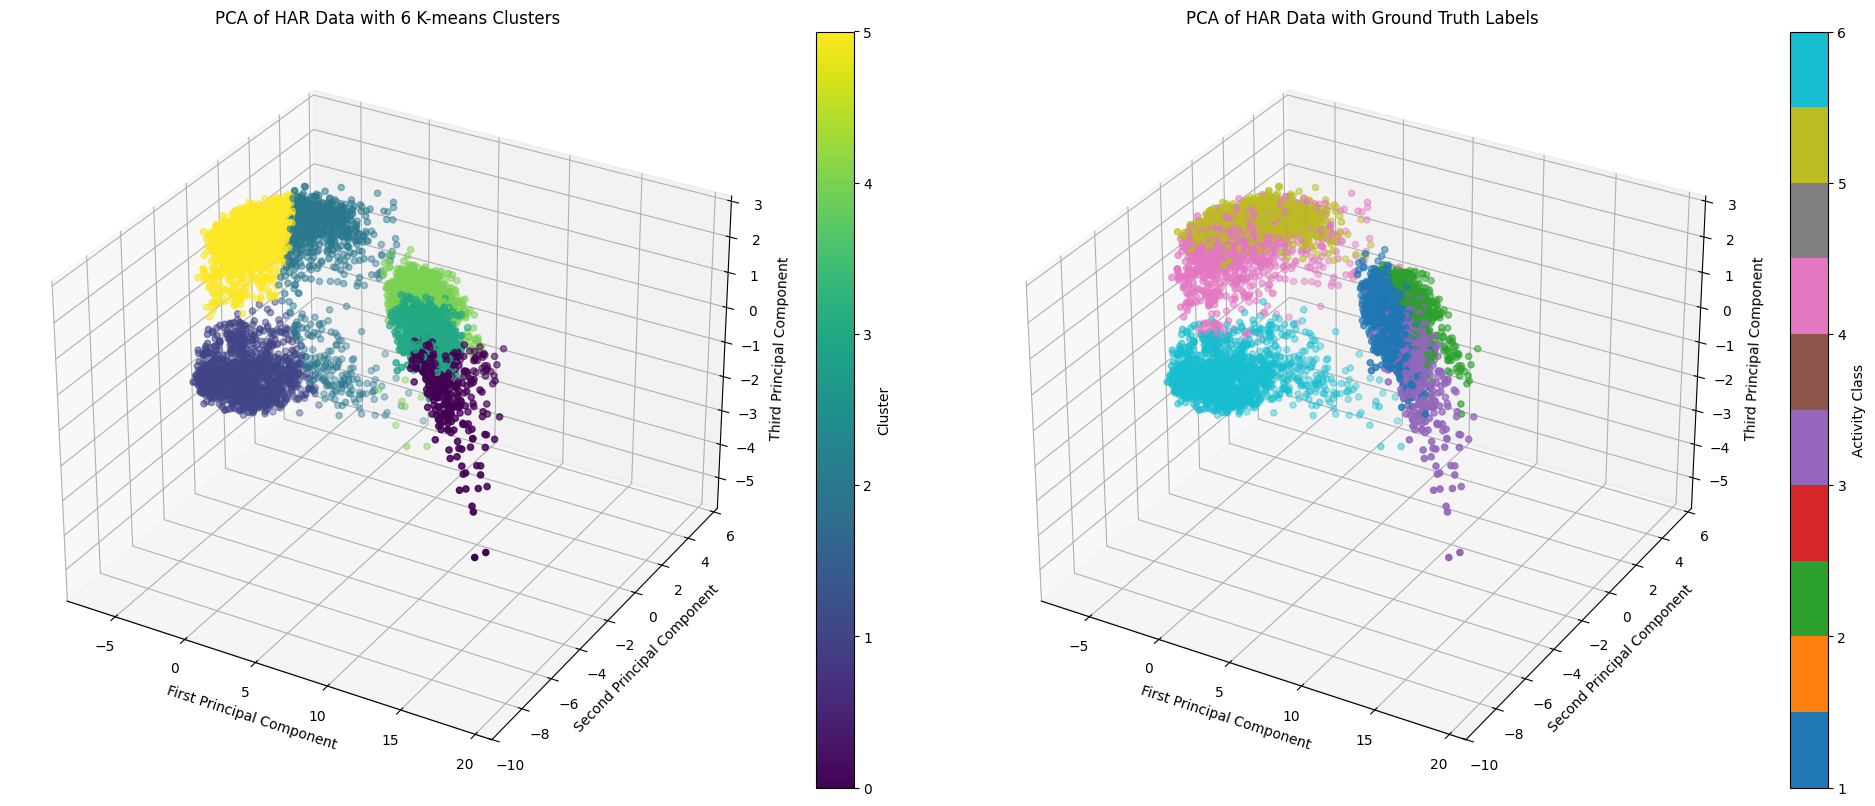

Cluster 1 Purity: 0.6156
Cluster 2 Purity: 0.9618
Cluster 3 Purity: 0.4682
Cluster 4 Purity: 0.4680
Cluster 5 Purity: 0.5142
Cluster 6 Purity: 0.5079

Average Cluster Purity: 0.5893

Cluster distribution:
Cluster 1: 346 samples
Cluster 2: 1282 samples
Cluster 3: 880 samples
Cluster 4: 1361 samples
Cluster 5: 1589 samples
Cluster 6: 1894 samples

Activity class distribution:
Class 1.0: 1226 samples
Class 2.0: 1073 samples
Class 3.0: 986 samples
Class 4.0: 1286 samples
Class 5.0: 1374 samples
Class 6.0: 1407 samples


In [55]:
# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x_train)

# Apply K-means clustering with 6 clusters
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(x_train)

# Visualize the results
fig = plt.figure(figsize=(20, 8))

# Plot with cluster labels
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='viridis')
ax1.set_title('PCA of HAR Data with 6 K-means Clusters')
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# Plot with ground truth labels
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_train, cmap='tab10')
ax2.set_title('PCA of HAR Data with Ground Truth Labels')
plt.colorbar(scatter2, ax=ax2, label='Activity Class')

for ax in [ax1, ax2]:
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    ax.set_zlabel('Third Principal Component')

plt.tight_layout()
plt.show()

# Calculate and print cluster purities
conf_matrix = confusion_matrix(y_train, cluster_labels)
cluster_purities = []
for cluster in range(n_clusters):
    cluster_counts = conf_matrix[:, cluster]
    cluster_purity = np.max(cluster_counts) / np.sum(cluster_counts)
    cluster_purities.append(cluster_purity)
    print(f"Cluster {cluster + 1} Purity: {cluster_purity:.4f}")

print(f"\nAverage Cluster Purity: {np.mean(cluster_purities):.4f}")

# Print cluster and class distributions
print("\nCluster distribution:")
for cluster in range(n_clusters):
    print(f"Cluster {cluster + 1}: {np.sum(cluster_labels == cluster)} samples")

print("\nActivity class distribution:")
for class_label in np.unique(y_train):
    print(f"Class {class_label}: {np.sum(y_train == class_label)} samples")

PCA transforms the dataset into a new set of uncorrelated features, allowing for a more efficient representation of the data. The primary hyperparameter in PCA is the number of components to retain.

Advantages:

*   Dimensionality Reduction: PCA effectively reduces the dimensionality of the dataset, facilitating faster computations and potentially improving clustering performance.
*   Noise Reduction: By focusing on components with higher variance, PCA can mitigate the impact of noisy features.

Disadvantages:

*   Information Loss: PCA involves projecting data onto a lower-dimensional space, leading to some information loss.
*   Assumption of Linearity: The linearity assumption might limit its effectiveness in capturing non-linear relationships.


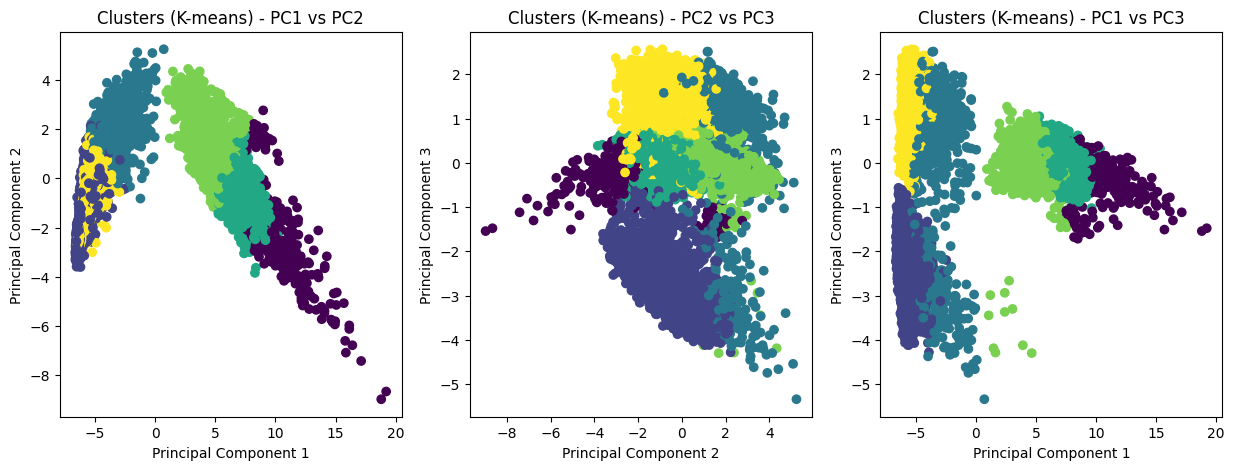

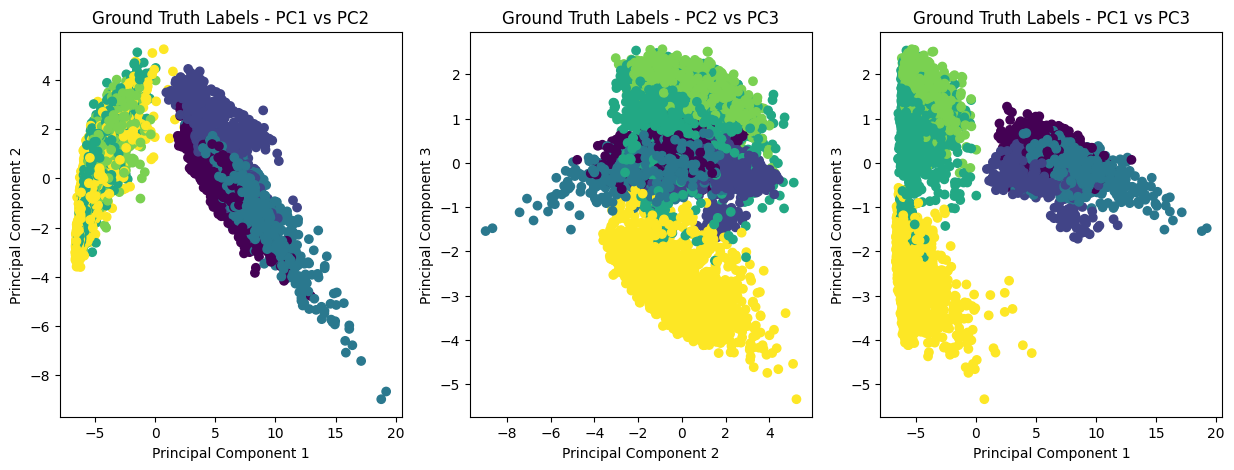

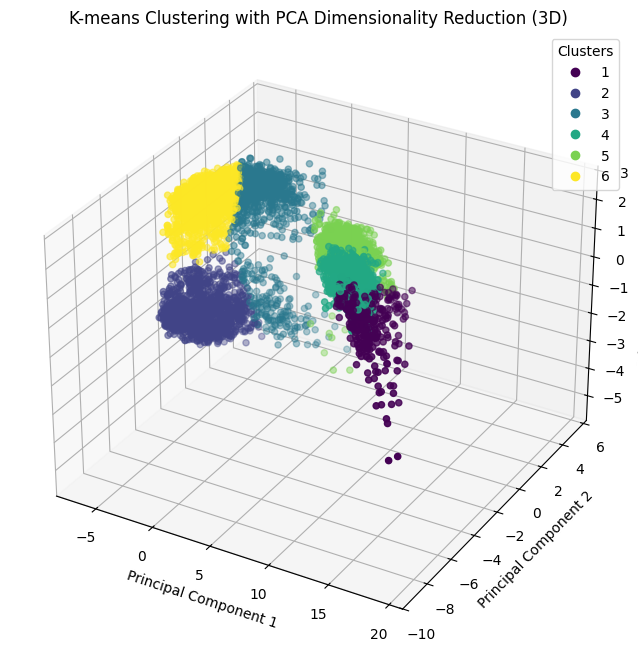

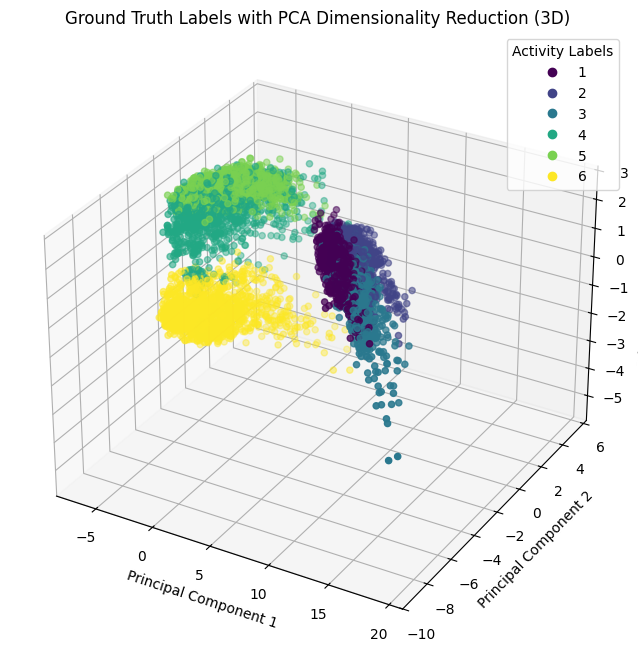

In [61]:

# Visualize clusters based on clustering labels (y_train)
fig = plt.figure(figsize=(15, 5))

# 2D Plots
ax1 = fig.add_subplot(131)
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
ax1.set_title('Clusters (K-means) - PC1 vs PC2')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

ax2 = fig.add_subplot(132)
ax2.scatter(X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='viridis')
ax2.set_title('Clusters (K-means) - PC2 vs PC3')
ax2.set_xlabel('Principal Component 2')
ax2.set_ylabel('Principal Component 3')

ax3 = fig.add_subplot(133)
ax3.scatter(X_pca[:, 0], X_pca[:, 2], c=cluster_labels, cmap='viridis')
ax3.set_title('Clusters (K-means) - PC1 vs PC3')
ax3.set_xlabel('Principal Component 1')
ax3.set_ylabel('Principal Component 3')

plt.show()

# Visualize clusters based on ground truth labels
fig = plt.figure(figsize=(15, 5))

# 2D Plots
ax1 = fig.add_subplot(131)
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
ax1.set_title('Ground Truth Labels - PC1 vs PC2')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

ax2 = fig.add_subplot(132)
ax2.scatter(X_pca[:, 1], X_pca[:, 2], c=y_train, cmap='viridis')
ax2.set_title('Ground Truth Labels - PC2 vs PC3')
ax2.set_xlabel('Principal Component 2')
ax2.set_ylabel('Principal Component 3')

ax3 = fig.add_subplot(133)
ax3.scatter(X_pca[:, 0], X_pca[:, 2], c=y_train, cmap='viridis')
ax3.set_title('Ground Truth Labels - PC1 vs PC3')
ax3.set_xlabel('Principal Component 1')
ax3.set_ylabel('Principal Component 3')

plt.show()

# 3D Plot for Clustering Labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels+1, cmap='viridis')
ax.set_title('K-means Clustering with PCA Dimensionality Reduction (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

# 3D Plot for Ground Truth Labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_train, cmap='viridis')
ax.set_title('Ground Truth Labels with PCA Dimensionality Reduction (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Activity Labels')
plt.show()


## Clustering Analysis Results

### K-means Performance (k=6)
- Average cluster purity: 0.5893
- Silhouette score: 0.3192
- Cluster sizes: [1395, 1401, 1338, 1277, 1096, 845]

### Key Observations
1. Moderate clustering success with one well-defined cluster (purity 0.9618)
2. Other clusters show mixed activities (purities 0.4680-0.6156)
3. Uneven cluster sizes suggest varying activity distinctiveness
4. Original classes are well-balanced (986-1407 samples each)

### Insights
- One activity (likely Class 4.0) is clearly distinguishable
- Other activities share similar features, causing overlap
- Potential for misclassification in less pure clusters

This analysis provides a foundation for improving Human Activity Recognition, highlighting both successes and areas for refinement in the clustering approach.